In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set_theme(style="whitegrid")


In [78]:
path = r'/Users/bryanleavelle/Bootcamp/Immersion/ch 4/DD-MM-2020 Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path,'Data', 'Prepared Data', "big_and_beautiful.pkl"))

In [79]:
df.shape

(32404859, 32)

# STEP ONE: PII ISSUES

In [3]:
# checking data for PII issues

for col in df:
    print(col)

order_id
user_id
order_number
order_day_of_week
hour_of_order
days_since_prior_order
product_id
add_to_cart_order
reordered
product_name
aisle_id
department_id
prices
price_range_loc
busiest_days
busiest_period_of_day
max_order
loyalty_flag
avg_order
spender_category
spender_flag_loc
customer_order_frequency
first_name
last_name
gender
state
age
date_joined
n_dependants
fam_status
income
_merge


###        First and last names are present. This could be an issue. Lets remove them.

In [4]:
#drop first and last names and save to new df "df2"

df2 = df.drop(columns = ['first_name', 'last_name'])

In [5]:
#check result

for col in df2:
    print(col)

order_id
user_id
order_number
order_day_of_week
hour_of_order
days_since_prior_order
product_id
add_to_cart_order
reordered
product_name
aisle_id
department_id
prices
price_range_loc
busiest_days
busiest_period_of_day
max_order
loyalty_flag
avg_order
spender_category
spender_flag_loc
customer_order_frequency
gender
state
age
date_joined
n_dependants
fam_status
income
_merge


###                They are gone. Great!

# STEP TWO: ADDING REGIONS BASED ON STATE

In [6]:
#Code for assigning Northeast Region

df2.loc[(df2['state'] == 'Maine') | (df2['state'] == 'New Hampshire') | (df2['state'] == 'Vermont') |
       (df2['state'] == 'Massachusetts') | (df2['state'] == 'Rhode Island') |
        (df2['state'] == 'Connecticut') | (df2['state'] == 'New York') | 
        (df2['state'] == 'Pennsylvania') | (df2['state'] == 'New Jersey'), 'region'] = 'Northeast'

In [7]:
#Code for assigning Midwest region

df2.loc[(df2['state'] == 'Wisconsin') | (df2['state'] == 'Michigan') | (df2['state'] == 'Illinois') |
       (df2['state'] == 'Indiana') | (df2['state'] == 'Ohio') |
        (df2['state'] == 'North Dakota') | (df2['state'] == 'South Dakota') | 
        (df2['state'] == 'Nebraska') | (df2['state'] == 'Kansas') | (df2['state'] == 'Minnesota') | 
        (df2['state'] == 'Iowa') | (df2['state'] == 'Missouri'), 'region'] = 'Midwest'

In [8]:
#Code for assigning South region

df2.loc[(df2['state'] == 'Delaware') | (df2['state'] == 'Maryland') | (df2['state'] == 'District of Columbia') |
       (df2['state'] == 'Virginia') | (df2['state'] == 'West Virginia') |
        (df2['state'] == 'North Carolina') | (df2['state'] == 'South Carolina') | 
        (df2['state'] == 'Georgia') | (df2['state'] == 'Florida') | (df2['state'] == 'Kentucky') | 
        (df2['state'] == 'Tennessee') | (df2['state'] == 'Mississippi') | (df2['state'] == 'Alabama') | 
         (df2['state'] == 'Oklahoma') | (df2['state'] == 'Texas') | (df2['state'] == 'Arkansas') |
        (df2['state'] == 'Louisiana'), 'region'] = 'South'

In [9]:
# Code for assigning West region

df2.loc[(df2['state'] == 'Idaho') | (df2['state'] == 'Montana') | (df2['state'] == 'Wyoming') |
       (df2['state'] == 'Nevada') | (df2['state'] == 'Utah') |
        (df2['state'] == 'Colorado') | (df2['state'] == 'Arizona') | 
        (df2['state'] == 'New Mexico') | (df2['state'] == 'Alaska') | (df2['state'] == 'Washington') | 
        (df2['state'] == 'Oregon') | (df2['state'] == 'California') | (df2['state'] == 'Hawaii'), 
        'region'] = 'West'

In [10]:
#value_counts to check for any nan

df2['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

### looks good! Now to see if there any spending differences between these regions:

In [11]:
crosstab = pd.crosstab(df2['region'], df2['spender_flag_loc'], dropna = False)

In [12]:
crosstab

spender_flag_loc,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


### South has both the highest number of high spenders and the highest number of low spenders. 
### Northeast has the least number of both categories.

# STEP THREE: EXLUDE LOW FREQUENCY BUYERS FOR CFO

### we already have a max_order column, and we can use this to filter the data set to include only the rows with a max_order of > 5

In [13]:
#filter df to only have max_orders > 5 and save as "newdf"

newdf = df2[(df2.max_order > 5)]

In [14]:
#check work: value_counts sorted by index to ensure there arent values 5 and under.

newdf['max_order'].value_counts().sort_index()

6      811396
7      803979
8      811843
9      810213
10     773124
       ...   
95      59877
96      40453
97      44949
98      44587
99    1171333
Name: max_order, Length: 94, dtype: int64

### Perfect. Now export data set for CFO:

In [ ]:
newdf.to_csv(os.path.join(path, 'Data', 'Prepared Data','CFO_data.csv' ))

# STEP FOUR: BUYER PROFILES

### using  categories  "Single Adult Non-Parent", "Single Adult Parent", "Married Adult Non-Parent" and "Married Adult Parent", where an adult is defined as anyone over the age of 25."

In [13]:
# Code for building categories and adding them to new column "adult_cat"

df2.loc[(df2['age'] >= 25) & (df2['fam_status'] == 'single') & (df2['n_dependants'] == 0), 'adult_cat'] = 'Single Adult Non-Parent'
df2.loc[(df2['age'] >= 25) & (df2['fam_status'] == 'single') & (df2['n_dependants'] > 0), 'adult_cat'] = 'Single Adult Parent'
df2.loc[(df2['age'] >= 25) & (df2['fam_status'] == 'married') & (df2['n_dependants'] == 0), 'adult_cat'] = 'Married Adult Non-Parent'
df2.loc[(df2['age'] >= 25) & (df2['fam_status'] == 'married') & (df2['n_dependants'] > 0), 'adult_cat'] = 'Married Adult Parent'



In [14]:
#check that column was added correctly

df2['adult_cat'].value_counts()

Married Adult Parent       21597933
Single Adult Non-Parent     4462113
Name: adult_cat, dtype: int64

### Seems weird that there are only married parents and single non-parents. Lets check a crosstab to make sure there really are no single parents or married non-parents in this df

In [15]:
crosstab2 = pd.crosstab(df2['fam_status'], df2['n_dependants'], dropna = False)

In [16]:
crosstab2

n_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


### strange but true I guess. Moving on!

In [17]:
#save seperate data frames for each working category to make graphs easier

df_married = df2.loc[(df2['adult_cat'] == 'Married Adult Parent')]

In [18]:
df_single = df2.loc[(df2['adult_cat'] == 'Single Adult Non-Parent')]

# STEP FIVE: VISUALIZATIONS FOR CATEGORY AGE DISTRIBUTIONS



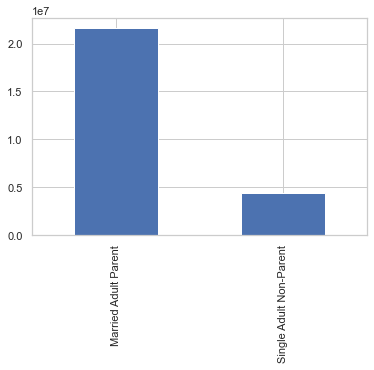

In [41]:
# code to create bar graph to show category distrubutions

bar3 = df2['adult_cat'].value_counts().plot.bar()

### Figure 1: more than 4 times the amount of married adult parents as single adult non-parents

# STEP 5: AGGREGATE MAX, MEAN AND MIN OF ORDER FREQUENCY AND EXPENDITURE

spender_category
customer_order_frequency

In [49]:
# first, save a new df only with prices less than 100 (there are giant values of 14k and 99k in this data set)
df3 = df2.loc[df2['prices'] < 100]

In [50]:
#aggregate min, max and mean for prices and group by adult_cat

df3.groupby('adult_cat').agg({'prices': ['mean', 'min', 'max']})

prices           
                             mean  min   max
adult_cat                                   
Married Adult Parent     7.790811  1.0  25.0
Single Adult Non-Parent  7.785782  1.0  25.0

### no real difference between the two in prices of items bought.<br><br> Lets compare the composition of both groups in the spender_category:

In [61]:
# group by adult_cat with counts of each in spender_category

df3.groupby('adult_cat')['spender_category'].value_counts(normalize = True)

adult_cat                spender_category
Married Adult Parent     Low spender         0.980328
                         High spender        0.019672
Single Adult Non-Parent  Low spender         0.981491
                         High spender        0.018509
Name: spender_category, dtype: float64

### 1.9% of married adult parents are high spenders, 1.8% of single adult non-parents are high spenders. No signifigant difference here, either.<br><br> Next, customer order frequencies:

In [58]:
# aggregate max_order and group by adult_cat

df3.groupby('adult_cat').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                              mean min max
adult_cat                                 
Married Adult Parent     32.900155   1  99
Single Adult Non-Parent  33.367041   3  99

### nothing interesting here, either...except maybe how the minimum order for single non-parent is 3 and married adult is 1.<br><br>Lets compare the composition of both groups in the customer_order_frequency variable:

In [62]:
# group by adult_cat with counts of each in customer_order_frequency variable



df3.groupby('adult_cat')['customer_order_frequency'].value_counts(normalize = True)

adult_cat                customer_order_frequency
Married Adult Parent     Frequent customer           0.586668
                         Regular customer            0.187154
                         Non-frequent customer       0.162041
                         Brand-new customer          0.064137
Single Adult Non-Parent  Frequent customer           0.588771
                         Regular customer            0.187351
                         Non-frequent customer       0.160107
                         Brand-new customer          0.063771
Name: customer_order_frequency, dtype: float64

### composition of both groups in the customer_order_frequency category are almost exactly the same. <b> <br> <br>CONCLUSION: There really is no difference between these two groups in how often they buy and the prices of the items they buy.

# STEP SIX: CUSTOMER PROFILES BY LOCATION AND DEPARTMENT

In [66]:
# save new DF using only the information we are interested in.

df4 = df2[['user_id', 'department_id', 'region', 'adult_cat']]

In [68]:
df4_region = df4[['adult_cat', 'region']]

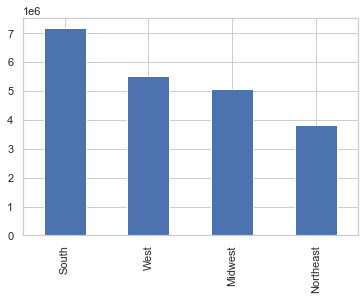

In [75]:
bar_married_region = df_married['region'].value_counts().plot.bar()

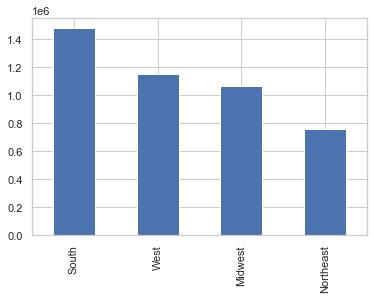

In [74]:
bar_single_region = df_single['region'].value_counts().plot.bar()

### regional distribution of both categories are similar

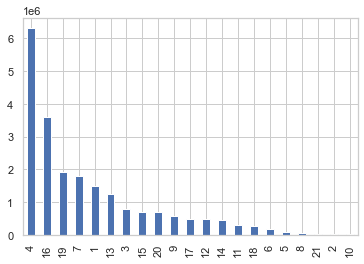

In [76]:
bar_married_department = df_married['department_id'].value_counts().plot.bar()

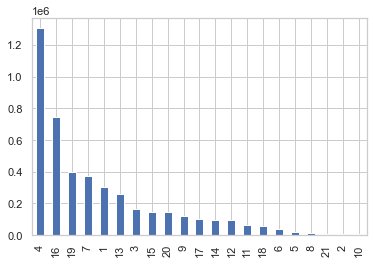

In [85]:
bar_single_department = df_single['department_id'].value_counts().plot.bar()

### departments these categories shop in are distributed exactly the same. Top 5 departments: <br>4 <br> 16 <br> 19 <br> 7 <br> 1

In [84]:
bar_married_department.figure.savefig(os.path.join(path, 'Data', 'bar_married_department.png'))

# EXTRA WORK REQUIRED BY EXCEL SHEET

### create new simpler price categories

In [90]:
df2.loc[(df2['prices'] > 20),'price_category'] = 'High Price'
df2.loc[(df2['prices'] <= 20) & (df2['prices'] > 15),'price_category'] = 'Mid-high Price'
df2.loc[(df2['prices'] <= 15) & (df2['prices'] > 10),'price_category'] = 'Mid Price'
df2.loc[(df2['prices'] <= 10) & (df2['prices'] > 5),'price_category'] = 'Mid-low Price'
df2.loc[(df2['prices'] <= 5),'price_category'] = 'Low Price'

In [91]:
df2['price_category'].value_counts()

Mid-low Price     11762458
Low Price         10126321
Mid Price         10098402
High Price          232348
Mid-high Price      185330
Name: price_category, dtype: int64

### graph for distribution of price categories

In [101]:
# new data frame with only product id and price category

df_product_price = df2[['product_id', 'price_category']]

In [102]:
#drop duplicate ids in new data frame
df_product_price = df_product_price.drop_duplicates(subset="product_id")

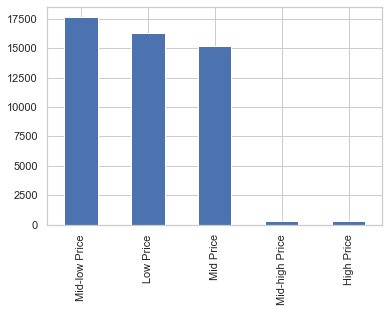

In [104]:
bar_price_categories = df_product_price['price_category'].value_counts().plot.bar()

### graphs for distribution of customers based on loyalty flag

In [110]:
#new data frame for loyalty flag and user id

df_loyalty = df2[['user_id', 'loyalty_flag']]

In [111]:
#drop duplicate user ids

df_loyalty = df_loyalty.drop_duplicates(subset="user_id")

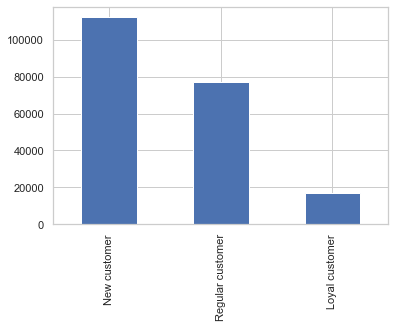

In [112]:
#code for graph

loyalty_bar = df_loyalty['loyalty_flag'].value_counts().plot.bar()

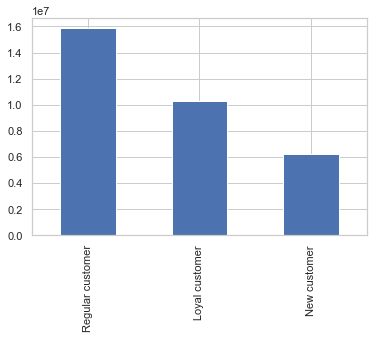

In [113]:
#code for graph for order frequencies of each loyalty category

loyalty_bar_2 = df2['loyalty_flag'].value_counts().plot.bar()

### graph for order frequency by region

In [114]:
# new DF with just price category and region

df_price_region = df2[['price_category', 'region']]

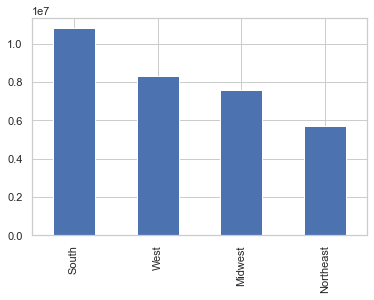

In [115]:
bar_price_region = df_price_region['region'].value_counts().plot.bar()

### crosstab to show price categories by region

In [116]:
crosstab3 = pd.crosstab(df_price_region['region'], df_price_region['price_category'], dropna = False)

In [117]:
crosstab3

price_category,High Price,Low Price,Mid Price,Mid-high Price,Mid-low Price
region,,,,,
Midwest,53733,2372304,2369122,44185,2757981
Northeast,40842,1792943,1779221,32360,2077370
South,77935,3368338,3367435,61455,3916722
West,59838,2592736,2582624,47330,3010385
